9


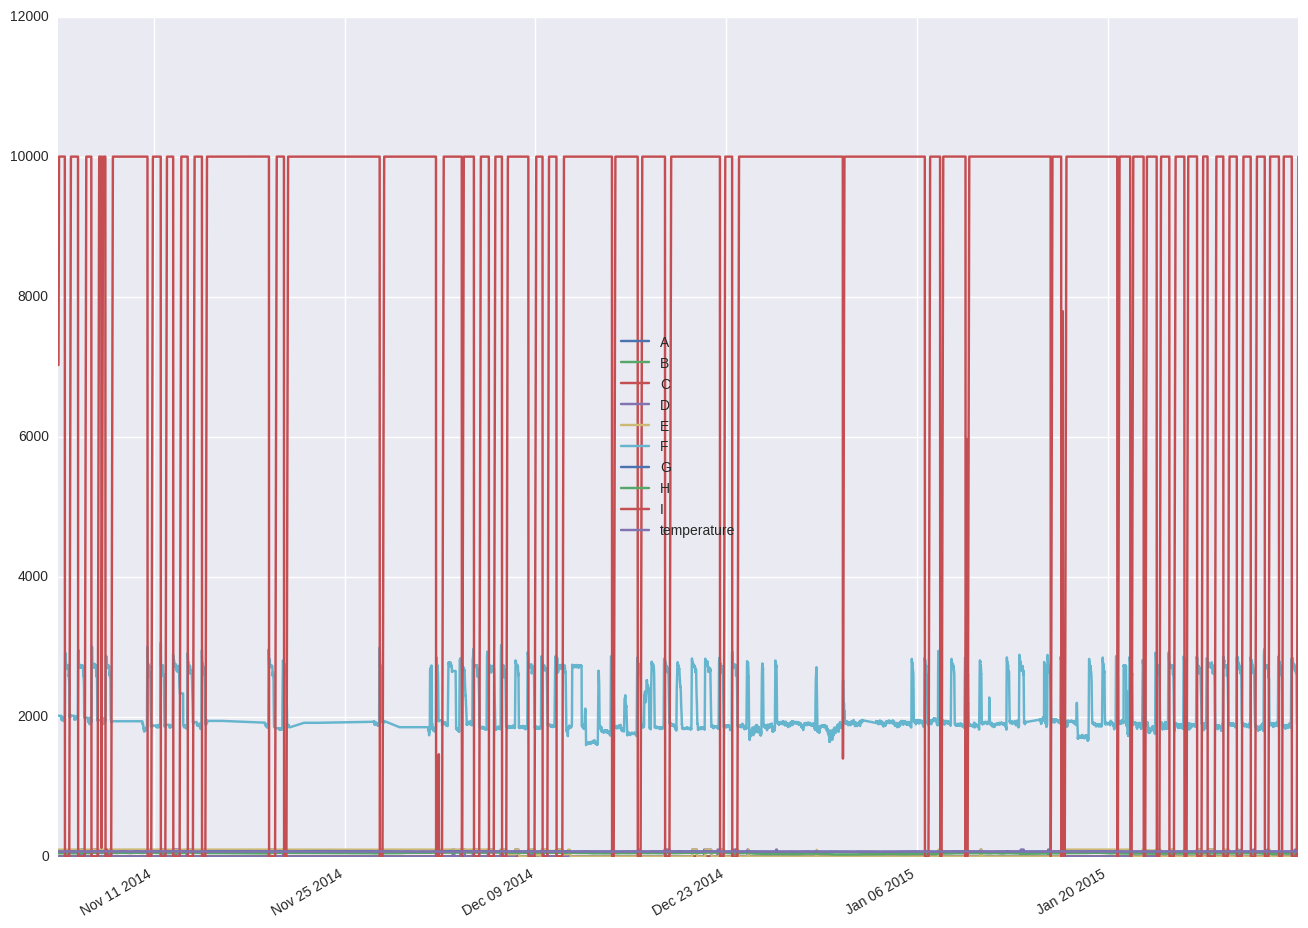

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pyflux as pf

from readers.mat_reader import MatReader

mat_reader = MatReader('ColdComplaintData/Training')

ts, xs, ys = mat_reader.read()

new_xs = []
for i in xrange(len(xs)):
    new_x = [n for n in xs[i]]
    new_x.append(ys[i])
    new_xs.append(new_x)

print(len(xs[0]))
df = pd.DataFrame(new_xs, index=ts, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'temperature'])
df.plot(figsize=(16, 12))

In [15]:
model = pf.ARIMAX(data=df,formula='temperature~A+B+C+D+E+F+G+H+I',ar=1,ma=1)
x = model.fit()
x.summary()

/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:84: RuntimeWarning: overflow encountered in square
  return -x**2 / 2.0 - _norm_pdf_logC
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/core.py:946: RuntimeWarning: invalid value encountered in double_scalars
  f(x - ee[i, :] + ee[j, :], *args, **kwargs) +
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1687: RuntimeWarning: overflow encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


ARIMAX(1,0,1)                                                                                             
======================================================= ==================================================
Dependent Variable: temperature                         Method: MLE                                       
Start Date: 2015-01-29 00:05:00                         Log Likelihood: -28802.3621                       
End Date: 2015-01-26 23:55:00                           AIC: 57630.7242                                   
Number of observations: 23037                           BIC: 57735.3074                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.6326     0.0097     65.0063  0.0      (0.6135 | 0.6517)        
MA(1)                                

/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/extrapolation.py:431: RuntimeWarning: invalid value encountered in less_equal
  converged = err <= tol
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:146: RuntimeWarning: invalid value encountered in less
  outliers = (((abs(der) < (a_median / trim_fact)) +
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:147: RuntimeWarning: invalid value encountered in greater
  (abs(der) > (a_median * trim_fact))) * (a_median > 1e-8) +
/home/federico/.virtualenvs/sdl/local/lib/python2.7/site-packages/numdifftools/limits.py:148: RuntimeWarning: invalid value encountered in less
  ((der < p25-1.5*iqr) + (p75+1.5*iqr < der)))


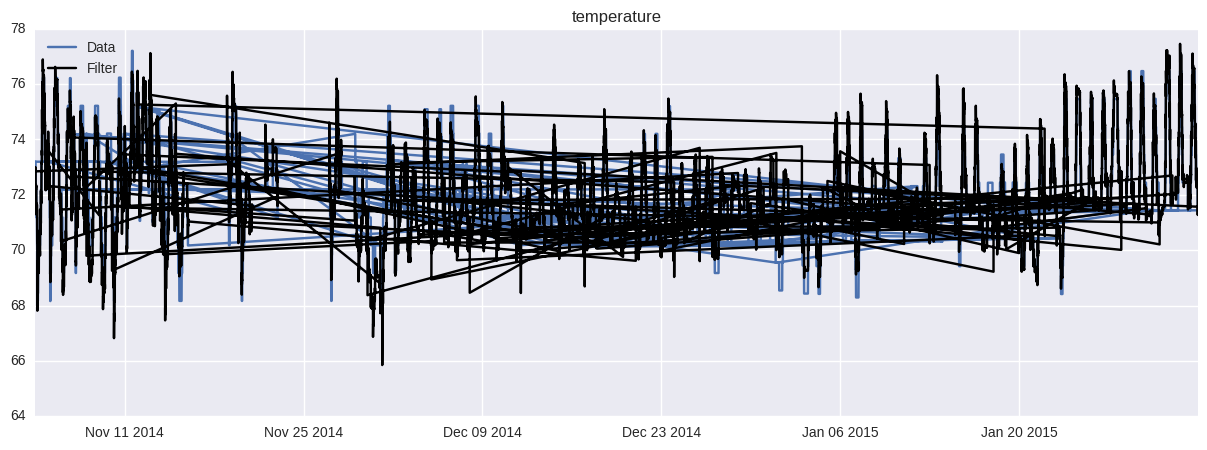

In [16]:
model.plot_fit(figsize=(15,5))

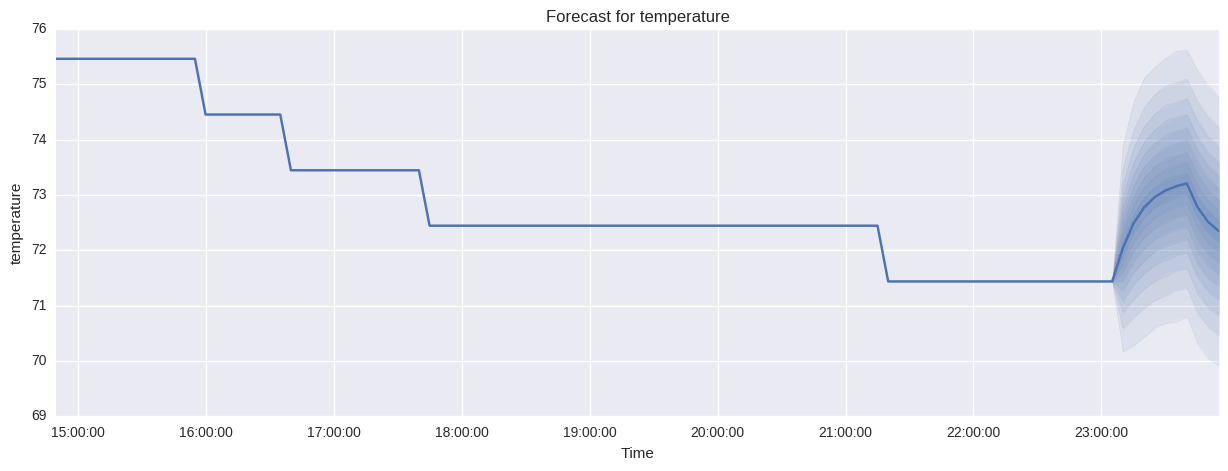

In [18]:
model.plot_predict(h=10,oos_data=df.iloc[-12:],past_values=100,figsize=(15,5))